## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0, 20)


In [3]:
Y = -X + 2

In [4]:
print("X is: \n", X)

X is: 
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [5]:
print("Y is: \n", Y)

Y is: 
 [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]


#### Plot your data points. 

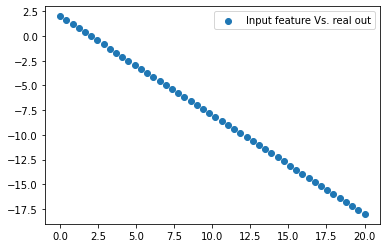

In [6]:
plt.scatter(X, Y, label = "Input feature Vs. real out")
plt.legend()
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [7]:
def gradient_descent(X, Y, alpha, num_iter):
    m = len(Y)
    cost_list = []
    thetas0 = []
    thetas1= []
    Hs = []
    theta1 = 0
    theta0 = 0
 
    for i in range(num_iter):
        # calculating model equation
        h = theta0+ (theta1*X)
        Hs.append(h)
        # calculating cost
        c = (h-Y)**2
        cost = (sum(c))/(2*m)
        #print(cost)
        cost_list.append(cost)


        # update theta
        gradient_theta0 = ((h-Y).sum())/m
        gradient_theta1 = (((h-Y)*X).sum())/m
        theta0 = theta0 - alpha*gradient_theta0
        theta1 = theta1 - alpha*gradient_theta1
        #print( gradient_theta0)

        thetas0.append(theta0)
        thetas1.append(theta1)
        if cost<0.1:
            break
    return(cost_list, thetas0, thetas1, Hs)


In [8]:
alpha = 0.0001
num_iter = 250
cost_list, thetas0, thetas1, H = gradient_descent(X, Y, alpha, num_iter)


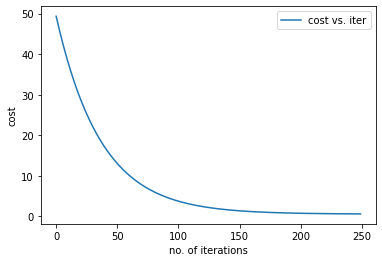

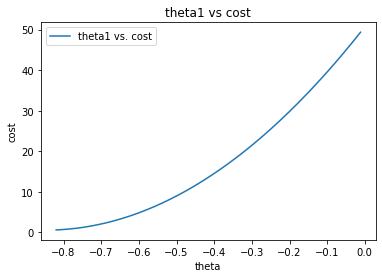

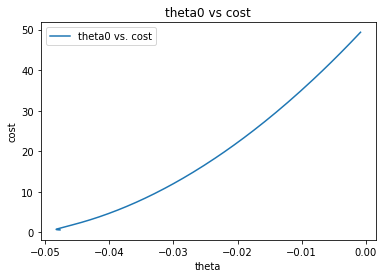

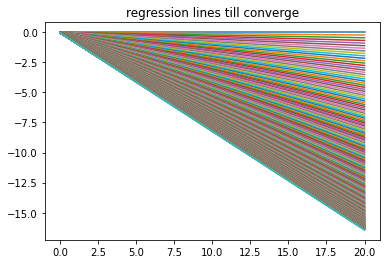

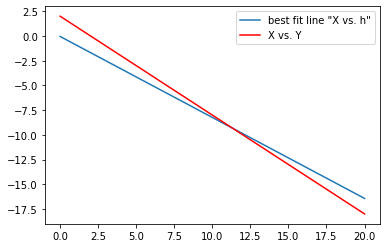

In [9]:

# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H[-1], label='best fit line "X vs. h"')
plt.plot(X, Y, label='X vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

In [10]:
mean = sum(Y) / len(Y)

ss_res = ((Y - H[-1])**2).sum()
ss_tot = ((Y - mean)**2).sum()

r2 = 1 - (ss_res / ss_tot)

print(r2)

0.9656419306065138


### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

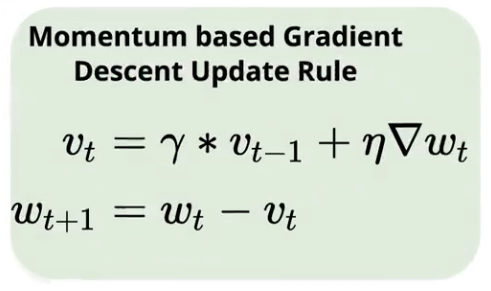

#### γ takes values between 0 and 1.
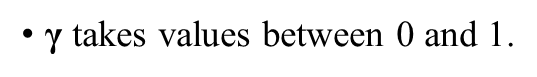

In [11]:
def GD_momentum(X, Y, alpha, gama, num_iter):
    m = len(Y)
    cost_list = []
    thetas0 = []
    thetas1= []
    Hs = []
    theta1 = 0
    theta0 = 0
    vt0 =0
    vt1 = 0
    
    
    for i in range(num_iter):
        # calculating model equation
        h = theta0+ (theta1*X)
        Hs.append(h)
        # calculating cost
        c = (h-Y)**2
        cost = (sum(c))/(2*m)
        #print(cost)
        cost_list.append(cost)


        # update theta
        gradient_theta0 = ((h-Y).sum())/m
        gradient_theta1 = (((h-Y)*X).sum())/m
        
        vt0 = (gama*vt0) + (alpha*gradient_theta0)
        vt1 = (gama*vt1) + (alpha*gradient_theta1)
        
        theta0 = theta0 - vt0
        theta1 = theta1 - vt1
        #print( gradient_theta0)

        thetas0.append(theta0)
        thetas1.append(theta1)
        if cost<0.1:
            break
    return(cost_list, thetas0, thetas1, Hs)


In [12]:
alpha = 0.0001
num_iter = 250
gama = 0.3
cost_list, thetas0, thetas1, H = GD_momentum(X, Y, alpha, gama, num_iter)


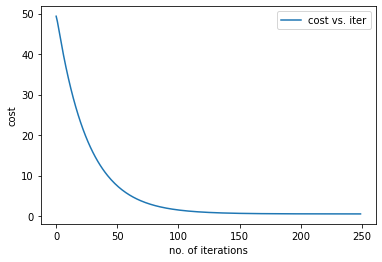

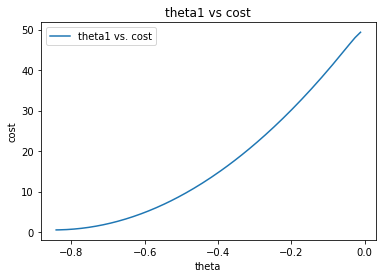

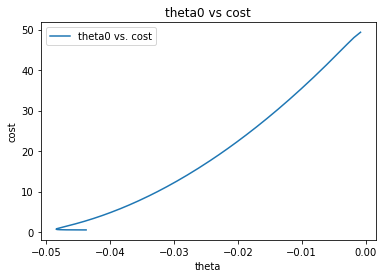

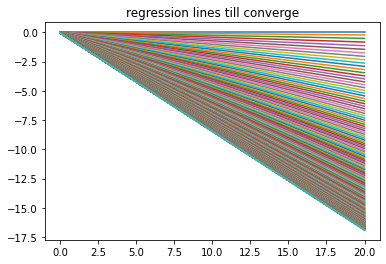

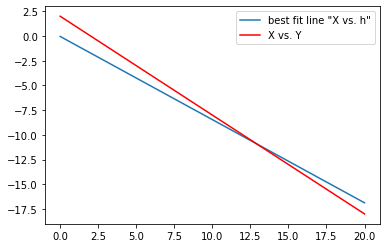

In [13]:

# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H[-1], label='best fit line "X vs. h"')
plt.plot(X, Y, label='X vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

# R2

In [14]:
mean = sum(Y) / len(Y)

ss_res = ((Y - H[-1])**2).sum()
ss_tot = ((Y - mean)**2).sum()

r2 = 1 - (ss_res / ss_tot)

print(r2)

0.9688164116683089


#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

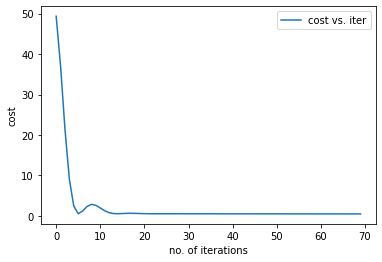

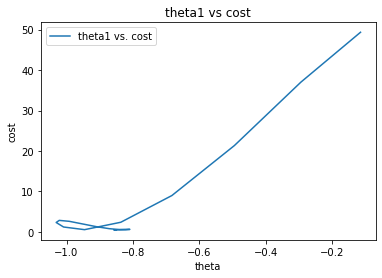

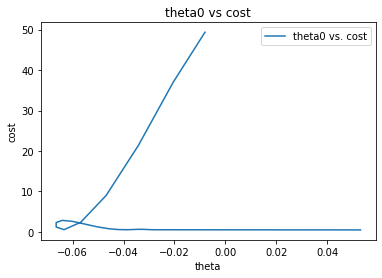

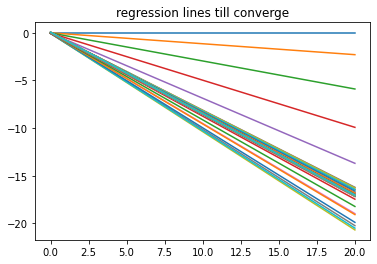

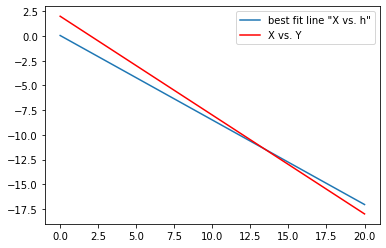

In [15]:
alpha = 0.001
num_iter = 70
gama = 0.7
cost_list, thetas0, thetas1, H = GD_momentum(X, Y, alpha, gama, num_iter)



# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H[-1], label='best fit line "X vs. h"')
plt.plot(X, Y, label='X vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

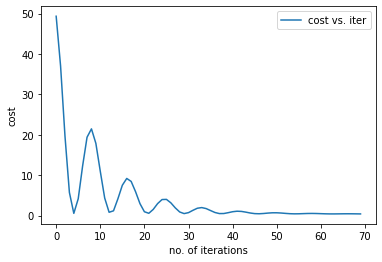

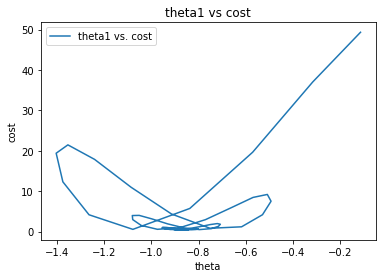

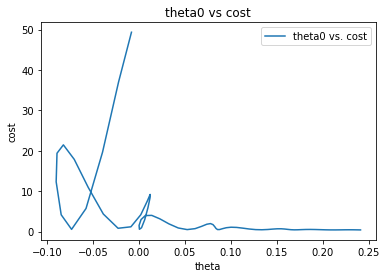

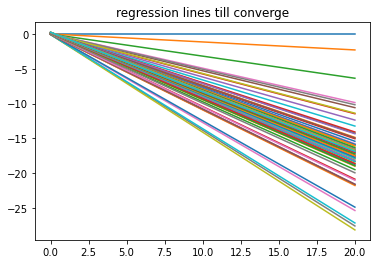

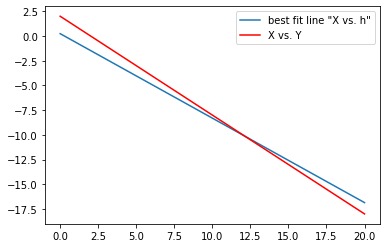

In [16]:
pha = 0.001
num_iter = 70
gama = 0.9
cost_list, thetas0, thetas1, H = GD_momentum(X, Y, alpha, gama, num_iter)


# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H[-1], label='best fit line "X vs. h"')
plt.plot(X, Y, label='X vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

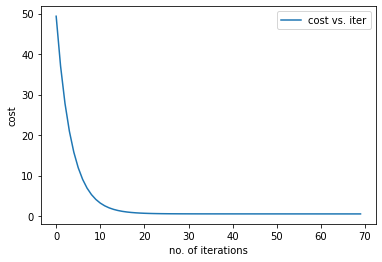

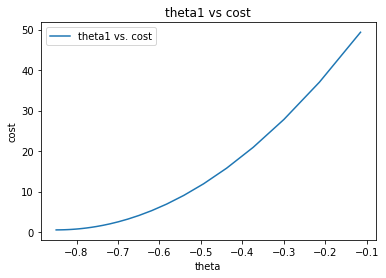

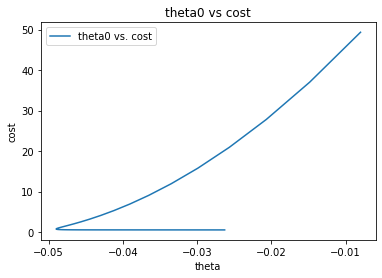

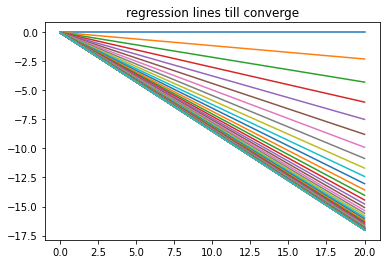

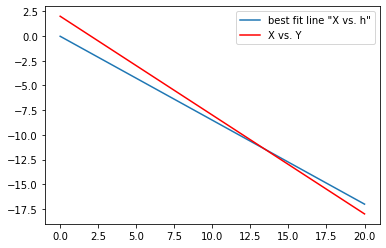

In [17]:
pha = 0.0001
num_iter = 70
gama = 0
cost_list, thetas0, thetas1, H = GD_momentum(X, Y, alpha, gama, num_iter)


# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H[-1], label='best fit line "X vs. h"')
plt.plot(X, Y, label='X vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

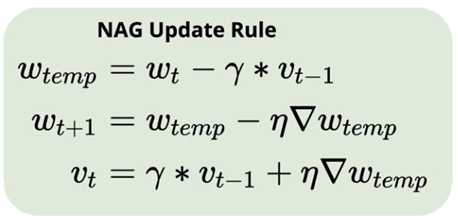

In [18]:
def GD_NAG(X, Y, alpha, gama, num_iter):
    m = len(Y)
    cost_list = []
    thetas0 = []
    thetas1= []
    Hs = []
    theta1 = 0
    theta0 = 0
    vt0 =0
    vt1 = 0
    
    
    for i in range(num_iter):
        # calculating model equation
        h = theta0+ (theta1*X)
        Hs.append(h)
        # calculating cost
        c = (h-Y)**2
        cost = (sum(c))/(2*m)
        #print(cost)
        cost_list.append(cost)


        # update theta
        gradient_theta0 = ((h-Y).sum())/m
        gradient_theta1 = (((h-Y)*X).sum())/m
        
        theta0_temp = theta0 - (gama*vt0) 
        theta1_temp = theta1 - (gama*vt1) 
    
        theta0 = theta0_temp - (alpha*gradient_theta0)
        theta1 = theta1_temp - (alpha*gradient_theta1)
        
        vt0 = (gama*vt0) + (alpha*gradient_theta0) 
        vt1 = (gama*vt1) + (alpha*gradient_theta1)
        
        #print( gradient_theta0)

        thetas0.append(theta0)
        thetas1.append(theta1)
        if cost<0.1:
            break
    return(cost_list, thetas0, thetas1, Hs)


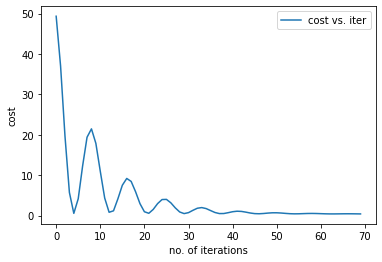

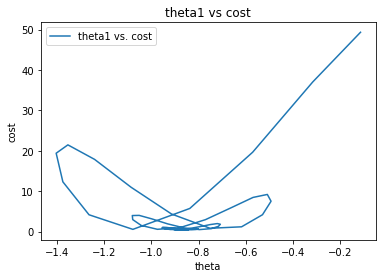

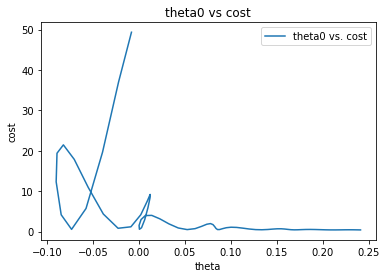

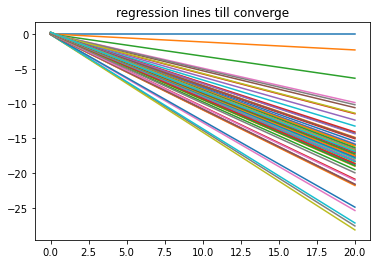

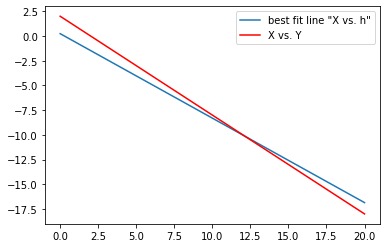

In [19]:
pha = 0.001
num_iter = 70
gama = 0.9
cost_list, thetas0, thetas1, H = GD_NAG(X, Y, alpha, gama, num_iter)


# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H[-1], label='best fit line "X vs. h"')
plt.plot(X, Y, label='X vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

# R2

In [20]:
mean = sum(Y) / len(Y)

ss_res = ((Y - H[-1])**2).sum()
ss_tot = ((Y - mean)**2).sum()

r2 = 1 - (ss_res / ss_tot)

print(r2)

0.9761205243840991


## Congratulations 
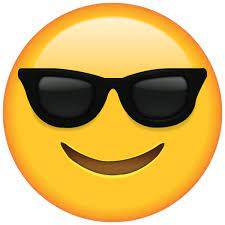